In [53]:
import sys,os
# Import the GDAL Library as gdal.
import osgeo.gdal as gdal
from spectral import *
import numpy as np

In [2]:
filepath = r"DATA/196488211/DATA_FILE_PROCESSED.img"
filepath

'DATA/196488211/DATA_FILE_PROCESSED.img'

In [3]:
img = gdal.Open(filepath)

In [4]:
type(Image)

osgeo.gdal.Dataset

In [15]:
Image.GetMetadata()

{}

In [ ]:
import sys
# Import the GDAL Library as gdal.
import osgeo.gdal as gdal

# Define a class named GDALTest
class GDALTest (object):

    # Define a function to open the image
    # and print the spatial information
    # associated with the image.
    def openGDALFile(self, filePath):
        # Open the image as a read only image
        dataset = gdal.Open( filePath, gdal.GA_ReadOnly )
        # Check the datasets has been successfully open
        # otherwise exit the script with an error message.
        if dataset is None:
            print ("The dataset could not openned")
            sys.exit(-1)
        print ('Size is ', dataset.RasterXSize, 'x', dataset.RasterYSize, 'x', dataset.RasterCount)
        geotransform = dataset.GetGeoTransform()
        print('Projection is ', dataset.GetProjection())
        if not geotransform is None:
            print('Origin = (',geotransform[0], ',',geotransform[3],')')
            print ('Pixel Size = (',geotransform[1], ',',geotransform[5]*-1,')')
    def run(self):
        filePath = r"E:\jayanthi-images\196488211\196488211\196488211_scene_HV\DATA_FILE_PROCESSED.img" 
        self.openGDALFile(filePath)

# The starting point of the script.
if __name__ == '__main__':
    obj = GDALTest()
    obj.run()           

        # Print the driver information being used
       # print ('Driver: ', dataset.GetDriver().ShortName, '/', \dataset.GetDriver().LongName)# Print the size of the image.
        
        # Print the image projection.
        
        # Get the geometric transformation
        
        # Check the whether the image has a geometric transformation
        # if a transformation is found print associated information.
        
    # A function to run the script.

In [17]:
import sys
# Import the GDAL Library as gdal.
import osgeo.gdal as gdal

# Define a class named GDALTest
class GDALTest (object):

    # Define a function to open the image
    # and print the spatial information
    # associated with the image.
    def openGDALFile(self, filePath):
        # Open the image as a read only image
        dataset = gdal.Open( filePath, gdal.GA_ReadOnly )
        # Check the datasets has been successfully open
        # otherwise exit the script with an error message.
        if dataset is None:
            print ("The dataset could not openned")
            sys.exit(-1)
        print ('Size is ', dataset.RasterXSize, 'x', dataset.RasterYSize, 'x', dataset.RasterCount)
        geotransform = dataset.GetGeoTransform()
        print('Projection is ', dataset.GetProjection())
        if not geotransform is None:
            print('Origin = (',geotransform[0], ',',geotransform[3],')')
            print ('Pixel Size = (',geotransform[1], ',',geotransform[5]*-1,')')
    def run(self):
        filePath = r"DATA/196488211/DATA_FILE_PROCESSED.img" 
        self.openGDALFile(filePath)

In [18]:
obj = GDALTest()
obj.run()

Size is  10472 x 13561 x 1
Projection is  
Origin = ( 0.0 , 0.0 )
Pixel Size = ( 1.0 , -1.0 )


In [29]:
dataset = gdal.Open( '/mnt/d/dev/SAR/TEST/DATA_FILE_PROCESSED.img', gdal.GA_ReadOnly )

In [30]:
 if dataset is None:
    print ("The dataset could not openned")
    sys.exit(-1)

The dataset could not openned


SystemExit: -1

In [31]:
dataset

In [32]:
print ('Size is ', dataset.RasterXSize, 'x', dataset.RasterYSize, 'x', dataset.RasterCount)

AttributeError: 'NoneType' object has no attribute 'RasterXSize'

In [28]:
os.path.join( os.getcwd(), 'DATA_FILE_PROCESSED.img')

'/mnt/d/dev/SAR/TEST/DATA_FILE_PROCESSED.img'

['.ipynb_checkpoints', 'DATA_FILE_PROCESSED.img', 'Untitled.ipynb']

## Show Elevation

In [47]:
# band = Image.GetRasterBand(1)
# elevation = band.ReadAsArray()

elevation = Image.ReadAsArray()

elevation.shape

(13561, 10472)

In [48]:
elevation.dtype

dtype('float32')

In [49]:
elevation

array([[1418.5662  ,  601.24036 , 1161.9109  , ..., 1616.4714  ,
         888.58765 ,  365.53796 ],
       [1489.0161  ,  326.49655 , 1237.6316  , ..., 1300.8582  ,
         209.78084 , 1249.0209  ],
       [1300.6829  ,  552.44183 , 1561.2203  , ...,  654.0833  ,
         636.3057  ,  948.43134 ],
       ...,
       [ 213.78494 ,  991.4888  , 1214.7893  , ..., 1145.0974  ,
        1003.6459  ,   60.074955],
       [1690.5034  ,  695.94037 ,  503.12027 , ..., 1198.65    ,
         694.7611  ,  492.7606  ],
       [1064.5271  ,  662.003   , 1009.90344 , ..., 1332.6245  ,
        1230.2277  ,  707.30615 ]], dtype=float32)

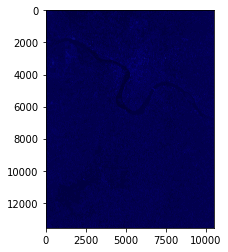

In [13]:
import matplotlib.pyplot as plt

plt.imshow(elevation, cmap='gist_earth')
plt.show()

### If you'd like to see a plot with proper* x,y coordinates, you'd do something similar to this:

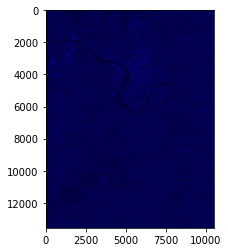

In [16]:
nrows, ncols = elevation.shape

# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = Image.GetGeoTransform()

x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(elevation, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.show()

In [17]:
Image.GetGeoTransform()

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

## Export Image

In [50]:
elevation[0][0]

1418.5662

In [51]:
save_rgb('196488211.tif', elevation)

KeyboardInterrupt: 

In [54]:
np.save('196488211.npy', elevation)